#  VGGNet
VGGNet is the 1st runner-up, not the winner of the ILSVRC-2014 in the classification task. VGGNet beats the GoogLeNet and won the localization task in ILSVRC 2014

### The highlights of the paper
- The Use of 3×3 Filters instead of large-size filters (such as 11×11, 7×7).
- Multi-Scale Training & Testing
- Dense (Convolutionalized) Testing
- Model Fusion

### The architecture
During training, the input to our ConvNets is a fixed-size 224 × 224 RGB image. The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel. The image is passed through a stack of convolutional (conv.) layers. All hidden layers are equipped with the rectification (ReLU (Krizhevsky et al., 2012)) non-linearity. The width of conv. layers (the number of channels) is rather small, starting from 64 in the first layer and then increasing by a factor of 2 after each max-pooling layer, until it reaches 512. Number of layers depend on VGG-11, VGG-11 (LRN), VGG-13, VGG-16 (Conv1), VGG-16 and VGG-19 architechure.
![orignal_architeture](./images/original_architechure.png)


# VGGNet implementation on Cifar 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Data Loading and Preprocessing

### CIFAR10 small image classification
Dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

#### Returns 2 tuples:
- **x_train, x_test**: uint8 array of RGB image data with shape (num_samples, 32, 32, 3).
- **y_train, y_test**: uint8 array of category labels (integers in range 0-9) with shape (num_samples,).

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
num_classes = 10
print("Number of training examples =", len(x_train))
print("Number of testing examples =", len(x_test))
print("Image data shape =", x_train[0].shape)
print("Number of classes =", num_classes)

Number of training examples = 50000
Number of testing examples = 10000
Image data shape = (32, 32, 3)
Number of classes = 10


In [4]:
x_train = x_train / 255.0
y_train = y_train / 255.0

In [4]:
# convert to one hot encoing 

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

## Model Implementation

In [1]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Input, Activation, BatchNormalization, Flatten, Dropout, Lambda
from tensorflow.keras.models import Model
import tensorflow as tf

### Model Architecture
The entire model consists of 14 layers in total. In addition to layers below lists what techniques are applied to build the model.

![vggnet.jpg](./images/vggnet.jpg)

In [6]:
x_train[0].shape

(32, 32, 3)

In [7]:
def vgg_11A():
    # Input Layer
    raw_inputs = Input()
    
    inputs = Lambda(lambda image:tf.image.resize_images(image, [227, 227]))(inputs)
    
    # Layer 1
    layer_1 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(inputs)
    
    # Layer 2
    layer_2 = MaxPool2D(pool_size=(2, 2), padding='same')(layer_1)
    
    # Layer 3
    layer_3 = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(layer_2)
    
    # Layer 4
    layer_4 = MaxPool2D(pool_size=(2, 2), padding='same')(layer_3)
    
    # Layer 5
    layer_5 = Conv2D(filters=256, kernel_size=(3, 3), padding='same', strides=(1, 1), activation='relu')(layer_4)
    
    # Layer 6
    layer_6 = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu')(layer_5)
    
    # Layer 7
    layer_7 = MaxPool2D(pool_size=(2, 2), padding='same')(layer_6)
    
    # Layer 8
    layer_8 = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(layer_7)
    
    # Layer 9
    layer_9 = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(layer_8)
    
    # Layer 10
    layer_10 = MaxPool2D(pool_size=(2, 2), padding='same')(layer_9)
    
    # Layer 11
    layer_11 = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(layer_10)
    
    # Layer 12
    layer_12 = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu')(layer_11)
    
    # Layer 13
    layer_13 = MaxPool2D(pool_size=(2, 2), padding='same')(layer_12)
    
    # Layer 14
    layer_14 = Flatten()(layer_13)
    
    # Layer 15
    layer_15 = Dense(units=4096, activation='relu')(layer_14)
    
    # Layer 16
    layer_16 = Dense(units=4096, activation='relu')(layer_15)
    
    # Layer 17
    layer_17 = Dense(units=1000)(layer_16)
    
    # Layer 18
    layer_18 = Activation(activation='softmax')(layer_17)
    
    model = Model(inputs, [layer_18])
    
    model.compile()
    
    

In [8]:
model = vgg_11A()
model.summary()

ValueError: Please provide to Input either a `shape` or a `tensor` argument. Note that `shape` does not include the batch dimension.

## Training

In [9]:
model.fit(x=x_train, y=y_train, epochs=50, batch_size=512, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 65s 2ms/step - loss: 1.9404 - acc: 0.3389 - val_loss: 1.8773 - val_acc: 0.3188
Epoch 2/50
40000/40000 [==============================] - 58s 1ms/step - loss: 1.3196 - acc: 0.5319 - val_loss: 1.3234 - val_acc: 0.5172
Epoch 3/50
40000/40000 [==============================] - 58s 1ms/step - loss: 1.0390 - acc: 0.6328 - val_loss: 1.0560 - val_acc: 0.6246
Epoch 4/50
40000/40000 [==============================] - 65s 2ms/step - loss: 0.8421 - acc: 0.7060 - val_loss: 1.1719 - val_acc: 0.6147
Epoch 5/50
40000/40000 [==============================] - 58s 1ms/step - loss: 0.7104 - acc: 0.7552 - val_loss: 0.9906 - val_acc: 0.6848
Epoch 6/50
40000/40000 [==============================] - 57s 1ms/step - loss: 0.6054 - acc: 0.7914 - val_loss: 1.0933 - val_acc: 0.6836
Epoch 7/50
40000/40000 [==============================] - 59s 1ms/step - loss: 0.5124 - acc: 0.8251 - val_loss: 0.8151 - val_acc

## Testing

In [10]:
model.evaluate(x=x_test, y=y_test)

10000/10000 [==============================] - 7s 723us/step


[1.317466844367981, 0.7675]

In [11]:
model.save('model.h5')
history = model.history

## Results
 
### Training from scratch

Training AlexNet, using stochastic gradient descent with a fixed learning rate of 0.01, for 50 epochs, we acheive a test accuracy of ~76.75%.

In accuracy and loss plot shown below, notice the large gap between the training and testing curves. This suggests that our model is overfitting.

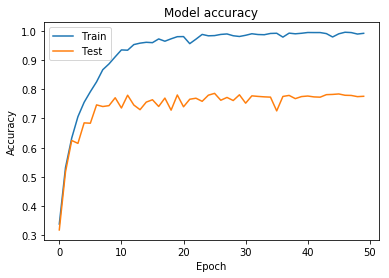

In [12]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

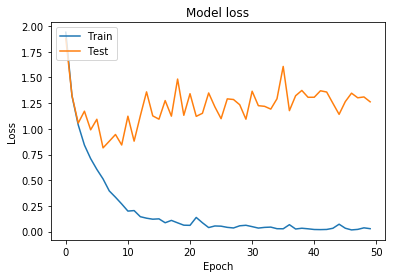

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Todo
- Expriment to stop model overfiting